In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Section 1: A first sight to our dataset

What is EDA?
- Understand the **shape** of our data
- Understand how the variables **interact** with each other
- Have a first sight of the **predictive power** of the variables
- Extract **some information** before applying any algorithm

It often uses **data visualization** to extract information from a dataset

Kelly note: it appears that an underlying driver of EDA compared to generic data analysis is that there is a desire to utilize machine learning on the dataset to seek insights.

In [2]:
# Read csv file into a pandas dataframe
df = pd.read_csv("sample_dataset.csv")

In [3]:
# see first 20 rows of data
df.head(20)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,NaN,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,NaN,2019.0,0.1622,0.6656,0.7119,0.26540,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,NaN,NaN,0.08690,0.07017,NaN,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.18600,0.2750,NaN,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,NaN,NaN,NaN,0.05999,...,25.53,NaN,1709.0,0.1444,0.4245,0.4504,0.24300,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,NaN,0.2597,0.09744,...,26.50,NaN,567.7,0.2098,0.8663,0.6869,0.25750,0.6638,0.17300,0
4,20.29,14.34,NaN,NaN,NaN,0.13280,0.19800,NaN,0.1809,NaN,...,16.67,152.20,1575.0,0.1374,NaN,0.4000,0.16250,0.2364,0.07678,0
5,12.45,15.70,82.57,NaN,0.12780,0.17000,0.15780,NaN,0.2087,0.07613,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.17410,0.3985,0.12440,0
6,18.25,NaN,119.60,NaN,NaN,0.10900,0.11270,0.07400,0.1794,0.05742,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.19320,NaN,0.08368,0
7,13.71,20.83,90.20,NaN,NaN,0.16450,0.09366,NaN,0.2196,0.07451,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.15560,0.3196,0.11510,0
8,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,...,30.73,106.20,739.3,0.1703,0.5401,NaN,0.20600,0.4378,0.10720,0
9,NaN,24.04,83.97,475.9,NaN,0.23960,0.22730,0.08543,NaN,0.08243,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.22100,0.4366,0.20750,0


In [4]:
# to check the data types of the dataset, mostly numbers ("float64"), but we see 'area error' which is an 'object'
df.dtypes

mean radius                float64
mean texture               float64
mean perimeter             float64
mean area                  float64
mean smoothness            float64
mean compactness           float64
mean concavity             float64
mean concave points        float64
mean symmetry              float64
mean fractal dimension     float64
radius error               float64
texture error              float64
perimeter error            float64
area error                  object
smoothness error           float64
compactness error          float64
concavity error            float64
concave points error       float64
symmetry error             float64
fractal dimension error    float64
worst radius               float64
worst texture              float64
worst perimeter            float64
worst area                 float64
worst smoothness           float64
worst compactness          float64
worst concavity            float64
worst concave points       float64
worst symmetry      

In [5]:
# to look specifically at 'area error' we can use the following to look at the values in this series
df['area error']

0        A
1        A
2        A
3        A
4      NaN
      ... 
564      A
565      A
566      A
567      A
568      A
Name: area error, Length: 569, dtype: object

In [6]:
# to look at what unique values exist in this series we can do the following:
df['area error'].unique()

array(['A', nan, 'B', 'C'], dtype=object)

In [7]:
# gives the row, row name, non-null count and data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              482 non-null    float64
 1   mean texture             492 non-null    float64
 2   mean perimeter           513 non-null    float64
 3   mean area                403 non-null    float64
 4   mean smoothness          384 non-null    float64
 5   mean compactness         480 non-null    float64
 6   mean concavity           439 non-null    float64
 7   mean concave points      382 non-null    float64
 8   mean symmetry            471 non-null    float64
 9   mean fractal dimension   504 non-null    float64
 10  radius error             475 non-null    float64
 11  texture error            434 non-null    float64
 12  perimeter error          381 non-null    float64
 13  area error               494 non-null    object 
 14  smoothness error         4

In [8]:
# gives rows then columns
df.shape

(569, 31)

In [9]:
# gives a true or false to the question which rows for a given column are NaN?
df.isna()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,True,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
1,False,False,False,False,True,True,False,False,True,False,...,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,True,True,True,False,...,False,True,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,True,False,False,...,False,True,False,False,False,False,False,False,False,False
4,False,False,True,True,True,False,False,True,False,True,...,False,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
565,True,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,True,False
566,False,False,False,True,False,False,True,False,False,False,...,False,False,False,False,True,False,False,False,False,False
567,False,False,False,False,False,False,False,False,False,True,...,True,False,False,False,False,False,False,False,False,False


In [10]:
# we can combine sum with the above to get the number of NaN by column
df.isna().sum()

mean radius                 87
mean texture                77
mean perimeter              56
mean area                  166
mean smoothness            185
mean compactness            89
mean concavity             130
mean concave points        187
mean symmetry               98
mean fractal dimension      65
radius error                94
texture error              135
perimeter error            188
area error                  75
smoothness error            77
compactness error          113
concavity error            190
concave points error        62
symmetry error              82
fractal dimension error    157
worst radius                94
worst texture              155
worst perimeter            109
worst area                  57
worst smoothness           101
worst compactness           95
worst concavity             62
worst concave points        74
worst symmetry             159
worst fractal dimension     99
target                       0
dtype: int64

In [11]:
# we can get percentage by the following:
(df.isna().sum()/df.shape[0])

mean radius                0.152900
mean texture               0.135325
mean perimeter             0.098418
mean area                  0.291740
mean smoothness            0.325132
mean compactness           0.156415
mean concavity             0.228471
mean concave points        0.328647
mean symmetry              0.172232
mean fractal dimension     0.114236
radius error               0.165202
texture error              0.237258
perimeter error            0.330404
area error                 0.131810
smoothness error           0.135325
compactness error          0.198594
concavity error            0.333919
concave points error       0.108963
symmetry error             0.144112
fractal dimension error    0.275923
worst radius               0.165202
worst texture              0.272408
worst perimeter            0.191564
worst area                 0.100176
worst smoothness           0.177504
worst compactness          0.166960
worst concavity            0.108963
worst concave points       0

In [12]:
# to sort the columns by percentage missing values
(df.isna().sum()/df.shape[0]).sort_values(ascending=False)

concavity error            0.333919
perimeter error            0.330404
mean concave points        0.328647
mean smoothness            0.325132
mean area                  0.291740
worst symmetry             0.279438
fractal dimension error    0.275923
worst texture              0.272408
texture error              0.237258
mean concavity             0.228471
compactness error          0.198594
worst perimeter            0.191564
worst smoothness           0.177504
worst fractal dimension    0.173989
mean symmetry              0.172232
worst compactness          0.166960
radius error               0.165202
worst radius               0.165202
mean compactness           0.156415
mean radius                0.152900
symmetry error             0.144112
mean texture               0.135325
smoothness error           0.135325
area error                 0.131810
worst concave points       0.130053
mean fractal dimension     0.114236
concave points error       0.108963
worst concavity            0

<Axes: >

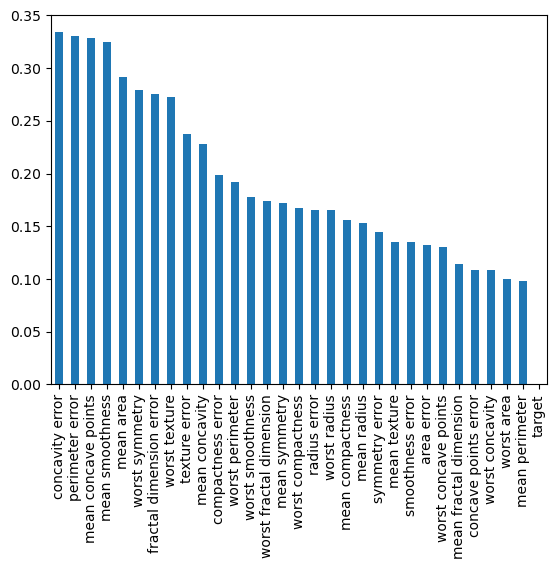

In [13]:
(df.isna().sum()/df.shape[0]).sort_values(ascending=False).plot(kind="bar")

In this section covered:
- Reading a file into Pandas
- Using `df.head()` to get a sense of the data
- Using `df.dtypes` to get a sense for the types of data in the data set
- Using the code `df['field name']` to get a sense for the values in the 'object' field called 'area error'
- Using the `df['field name'].unique()` method to get a list of the unique values in the object field noted above
- Using `df.info()` to get a list of rows and number of non-null values as well as the data types
- Using `df.shape` to get rows and columns
- Using `df.isna()` to get the NaN values in the data set
- Combining `(df.isna().sum()` to get the number of NaN values by row
- Combining `(df.isna().sum()/shape[0])` to get the percentage of NaN values by row
- Combining `(df.isna().sum()/shape[0].sort_values(ascending=False)` to get a sorted list of percentage NaN values by row
- Combining `(df.isna().sum()/shape[0].sort_values(ascending=False).plot(kind="bar")` to get a chart to visualize the proportion of NaN by row

# Section 2: Summarization

In [14]:
# summarize the data set quickly with describe(); this method will exclude any non-numerical columns
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,482.000000,492.000000,513.000000,403.000000,384.000000,480.000000,439.000000,382.000000,471.000000,504.000000,...,414.000000,460.000000,512.000000,468.000000,474.000000,507.000000,495.000000,410.000000,470.000000,569.000000
mean,14.059548,19.311829,92.039025,661.522581,0.097156,0.104531,0.094063,0.049115,0.181405,0.062626,...,25.599058,107.322848,893.873828,0.133065,0.256748,0.267936,0.116579,0.291797,0.084363,0.627417
std,3.501791,4.347769,24.028669,356.669534,0.014502,0.053335,0.083301,0.038449,0.027633,0.007102,...,6.186596,33.967766,587.297571,0.023000,0.160373,0.209779,0.066426,0.066327,0.018683,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.490000,54.490000,185.200000,0.071170,0.034320,0.000000,0.000000,0.156600,0.055040,0.000000
25%,11.672500,16.170000,75.270000,428.100000,0.086688,0.064815,0.030410,0.020682,0.161950,0.057530,...,20.842500,84.147500,510.275000,0.117175,0.144500,0.106450,0.065280,0.248725,0.071857,0.000000
50%,13.280000,18.860000,86.340000,556.700000,0.096565,0.093125,0.068240,0.033770,0.179100,0.061300,...,25.225000,97.455000,686.550000,0.131450,0.211850,0.212300,0.101500,0.282050,0.079870,1.000000
75%,15.745000,21.802500,104.700000,796.000000,0.106825,0.130325,0.135100,0.074122,0.196600,0.066003,...,29.485000,126.950000,1141.000000,0.147125,0.343800,0.384100,0.165650,0.319750,0.092172,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.290600,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [15]:
# we can ask pandas to give us specific calculations, in this case percentiles as shown below
df.describe(percentiles=[0.25,0.5,0.75,0.05,0.95])

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,482.000000,492.000000,513.000000,403.000000,384.000000,480.000000,439.000000,382.000000,471.000000,504.000000,...,414.000000,460.000000,512.000000,468.000000,474.000000,507.000000,495.000000,410.000000,470.000000,569.000000
mean,14.059548,19.311829,92.039025,661.522581,0.097156,0.104531,0.094063,0.049115,0.181405,0.062626,...,25.599058,107.322848,893.873828,0.133065,0.256748,0.267936,0.116579,0.291797,0.084363,0.627417
std,3.501791,4.347769,24.028669,356.669534,0.014502,0.053335,0.083301,0.038449,0.027633,0.007102,...,6.186596,33.967766,587.297571,0.023000,0.160373,0.209779,0.066426,0.066327,0.018683,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.490000,54.490000,185.200000,0.071170,0.034320,0.000000,0.000000,0.156600,0.055040,0.000000
5%,9.439400,13.071000,60.922000,279.690000,0.075221,0.041970,0.004926,0.006431,0.140700,0.053783,...,16.767500,67.878000,337.815000,0.097336,0.071879,0.014069,0.025448,0.210315,0.062888,0.000000
25%,11.672500,16.170000,75.270000,428.100000,0.086688,0.064815,0.030410,0.020682,0.161950,0.057530,...,20.842500,84.147500,510.275000,0.117175,0.144500,0.106450,0.065280,0.248725,0.071857,0.000000
50%,13.280000,18.860000,86.340000,556.700000,0.096565,0.093125,0.068240,0.033770,0.179100,0.061300,...,25.225000,97.455000,686.550000,0.131450,0.211850,0.212300,0.101500,0.282050,0.079870,1.000000
75%,15.745000,21.802500,104.700000,796.000000,0.106825,0.130325,0.135100,0.074122,0.196600,0.066003,...,29.485000,126.950000,1141.000000,0.147125,0.343800,0.384100,0.165650,0.319750,0.092172,1.000000
95%,20.569000,27.700000,135.780000,1307.100000,0.121755,0.210745,0.255150,0.120275,0.234550,0.076020,...,36.094500,171.145000,2020.350000,0.171910,0.574745,0.678210,0.240170,0.412880,0.120455,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.290600,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [16]:
# we can also use describe() for non-numerical values as below:
df.describe(include=['object'])

,area error
count,494
unique,3
top,A
freq,489


In [17]:
# as we learned above, we have a field called 'area error', which is an object and we can get a summary of the values as follows:
df['area error'].value_counts()

area error
A    489
B      4
C      1
Name: count, dtype: int64

In [18]:
# can also call the object and category together
df.describe(include=['object','category'])

,area error
count,494
unique,3
top,A
freq,489


In this section we covered some simple summarization tools:
- Primarily, the `df.describe()` method, which gives summary statistics for a given numerical field
- We saw how we can alter the calculations that are given via the `df.describe(percentiles[0.05,0.95])` specification within the describe method
- However, we also saw how `df.describe()` can be used with non-numeric fields to summarize values, as well as how to use the `df['field name'].value_counts` summarization technique

# Section 3: Histograms

array([[<Axes: title={'center': 'mean radius'}>,
        <Axes: title={'center': 'mean texture'}>,
        <Axes: title={'center': 'mean perimeter'}>,
        <Axes: title={'center': 'mean area'}>,
        <Axes: title={'center': 'mean smoothness'}>],
       [<Axes: title={'center': 'mean compactness'}>,
        <Axes: title={'center': 'mean concavity'}>,
        <Axes: title={'center': 'mean concave points'}>,
        <Axes: title={'center': 'mean symmetry'}>,
        <Axes: title={'center': 'mean fractal dimension'}>],
       [<Axes: title={'center': 'radius error'}>,
        <Axes: title={'center': 'texture error'}>,
        <Axes: title={'center': 'perimeter error'}>,
        <Axes: title={'center': 'smoothness error'}>,
        <Axes: title={'center': 'compactness error'}>],
       [<Axes: title={'center': 'concavity error'}>,
        <Axes: title={'center': 'concave points error'}>,
        <Axes: title={'center': 'symmetry error'}>,
        <Axes: title={'center': 'fractal dimen

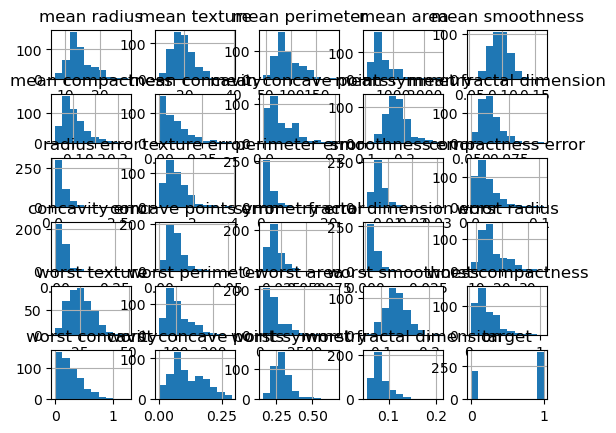

In [19]:
# get a histogram of each numeric field
df.hist()

array([[<Axes: title={'center': 'mean radius'}>,
        <Axes: title={'center': 'mean texture'}>],
       [<Axes: title={'center': 'mean perimeter'}>,
        <Axes: title={'center': 'mean area'}>]], dtype=object)

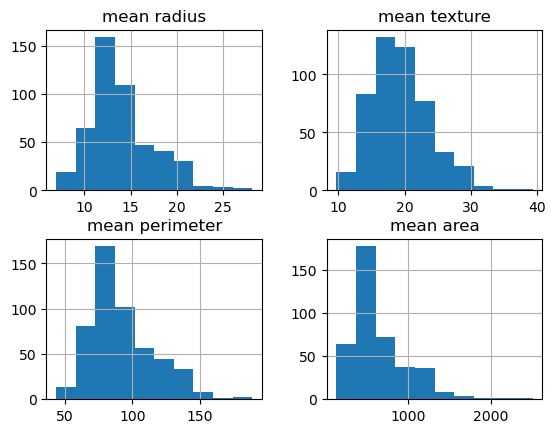

In [20]:
# the above is very hard to reac, so we can do as follows to look at subsets of the numerical fields
df.iloc[:,0:4].hist()

array([[<Axes: title={'center': 'mean radius'}>,
        <Axes: title={'center': 'mean texture'}>],
       [<Axes: title={'center': 'mean perimeter'}>,
        <Axes: title={'center': 'mean area'}>]], dtype=object)

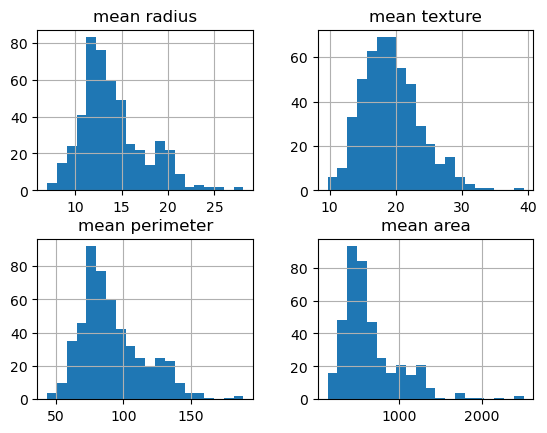

In [21]:
# we can also manipulate the number of bins for the subset above as follows:
df.iloc[:,0:4].hist(bins=20)

array([[<Axes: title={'center': 'mean radius'}>,
        <Axes: title={'center': 'mean texture'}>],
       [<Axes: title={'center': 'mean perimeter'}>,
        <Axes: title={'center': 'mean area'}>]], dtype=object)

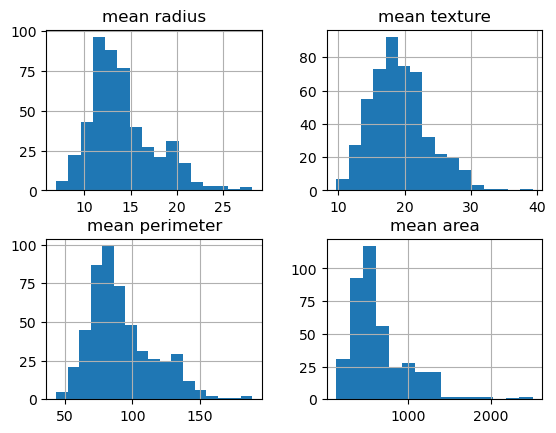

In [22]:
# I did not quite catch what this bins="rice" thing is, but contextually, I think he's saying it try to get the right number
df.iloc[:,0:4].hist(bins="rice")

<Axes: xlabel='area error'>

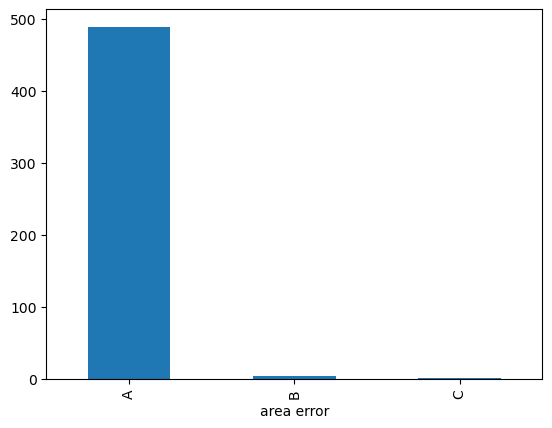

In [23]:
# to get the distribution of the categorical variables we can do as follows:
df['area error'].value_counts().plot(kind="bar")

# Section 4: Boxplots

<Axes: >

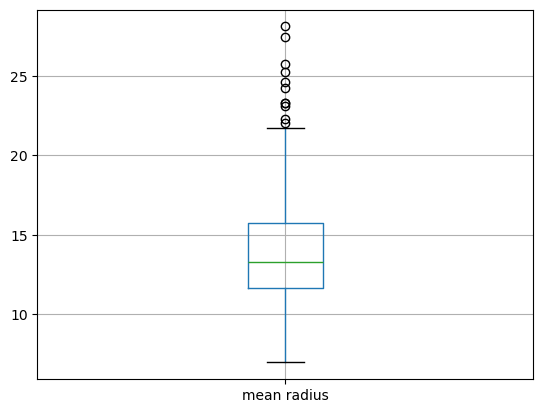

In [24]:
# create a boxplot for the 'mean radius' field, need to use the double square brackets because boxplot is a method of a DataFrame
df[['mean radius']].boxplot()

A note on the chart above: 
1. $IQR = Q_3 - Q_1$.
2. 1.5 is a constant used to discern outliers in interquartile outlier analysis.
3. Add $1.5\times$ $IQR$ to $Q_3$.  Any number greater than this is a suspected outlier.
4. Subtract $1.5\times$ $IQR$ from $Q_1$.  Any number less than this is a suspected outlier.

The circles on the boxplot above are suspected outliers.  The green line is the median.  The blue box represents the $Q_1$ on the lower end of the box and the $Q_3$ on the higher end of the box.  The lines represent the minimum and the maximum of the data set.

array([[<Axes: title={'center': 'mean radius'}>]], dtype=object)

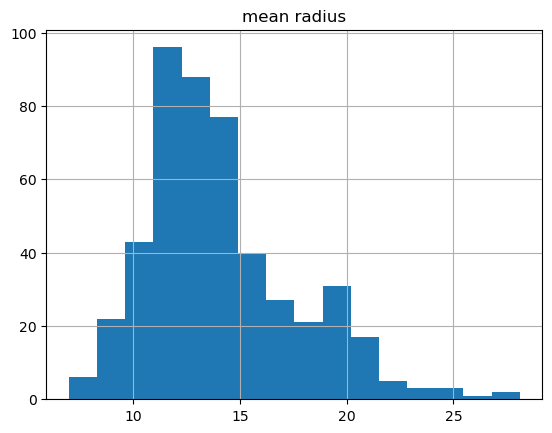

In [25]:
# compare outliers from histogram to the outliers depicted in the boxplot
df[['mean radius']].hist(bins='rice')

<Axes: >

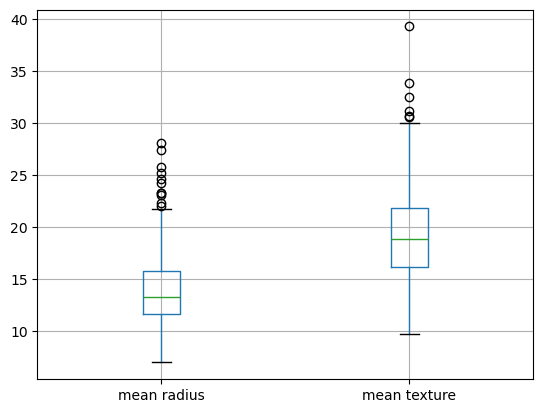

In [26]:
# you can do more than one boxplot at a time as follows:
df[['mean radius','mean texture']].boxplot()

<Axes: >

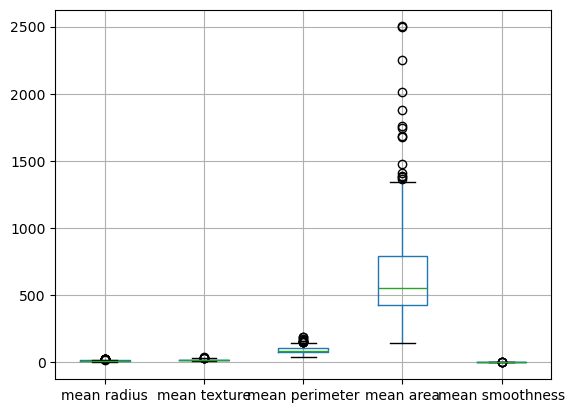

In [27]:
# we can also ask for the first five variables as follows using iloc
df.iloc[:,0:5].boxplot()

# Section 5: Pairplots

C:\Users\kellyja\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\kellyja\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\kellyja\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\kellyja\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed

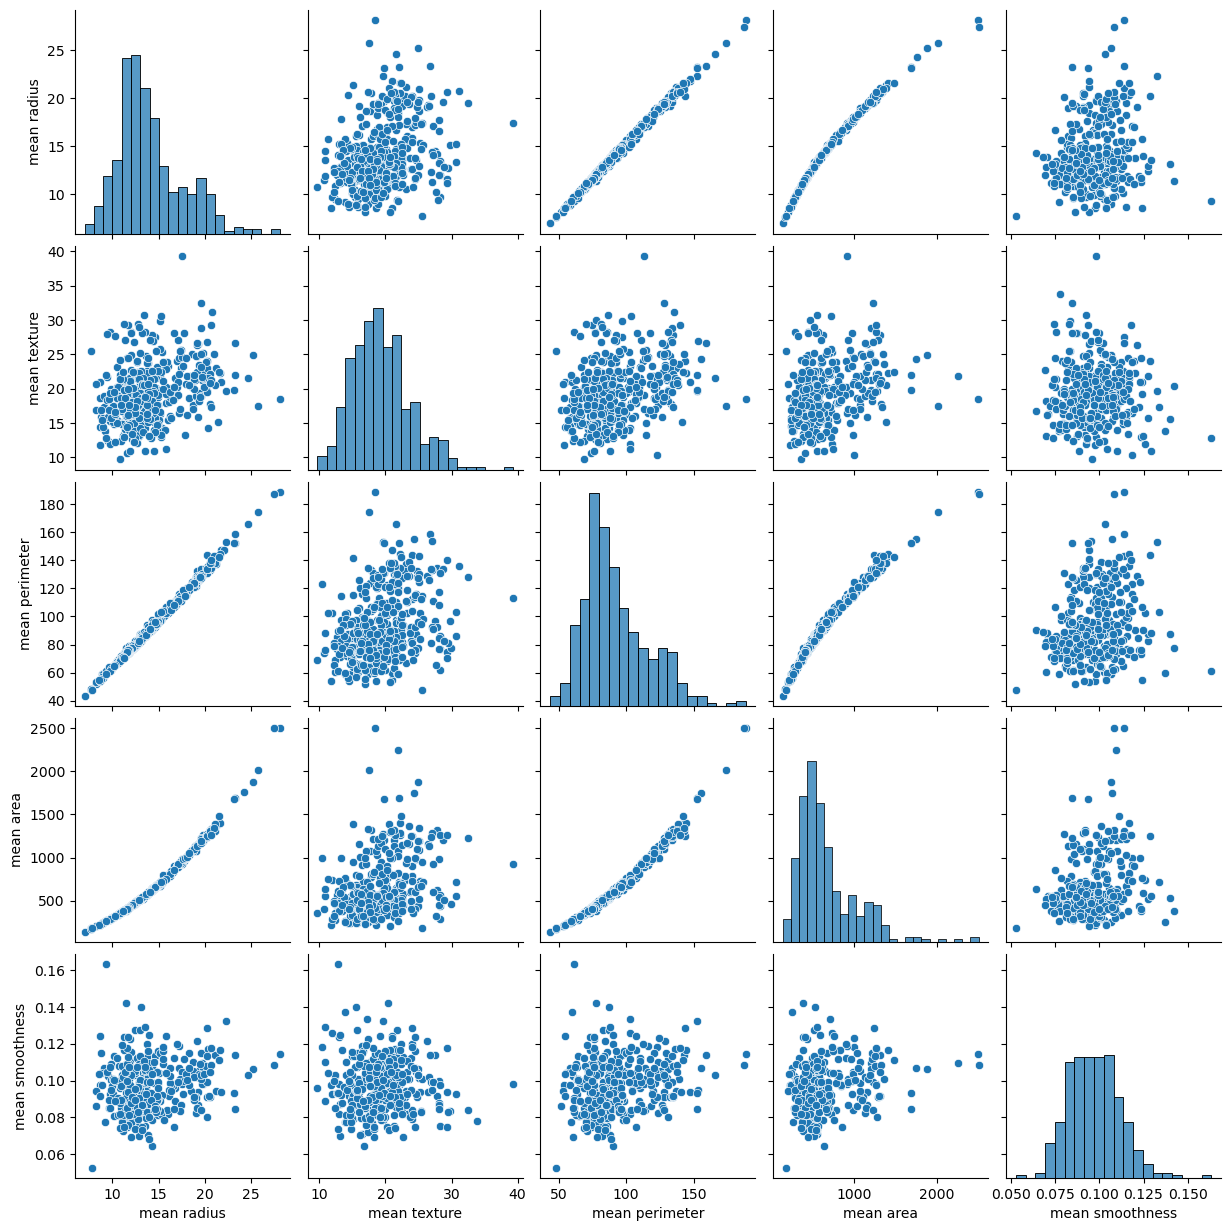

In [28]:
# to compare relationship between variables
sns.pairplot(df.iloc[:,0:5])

C:\Users\kellyja\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\kellyja\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\kellyja\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\kellyja\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed

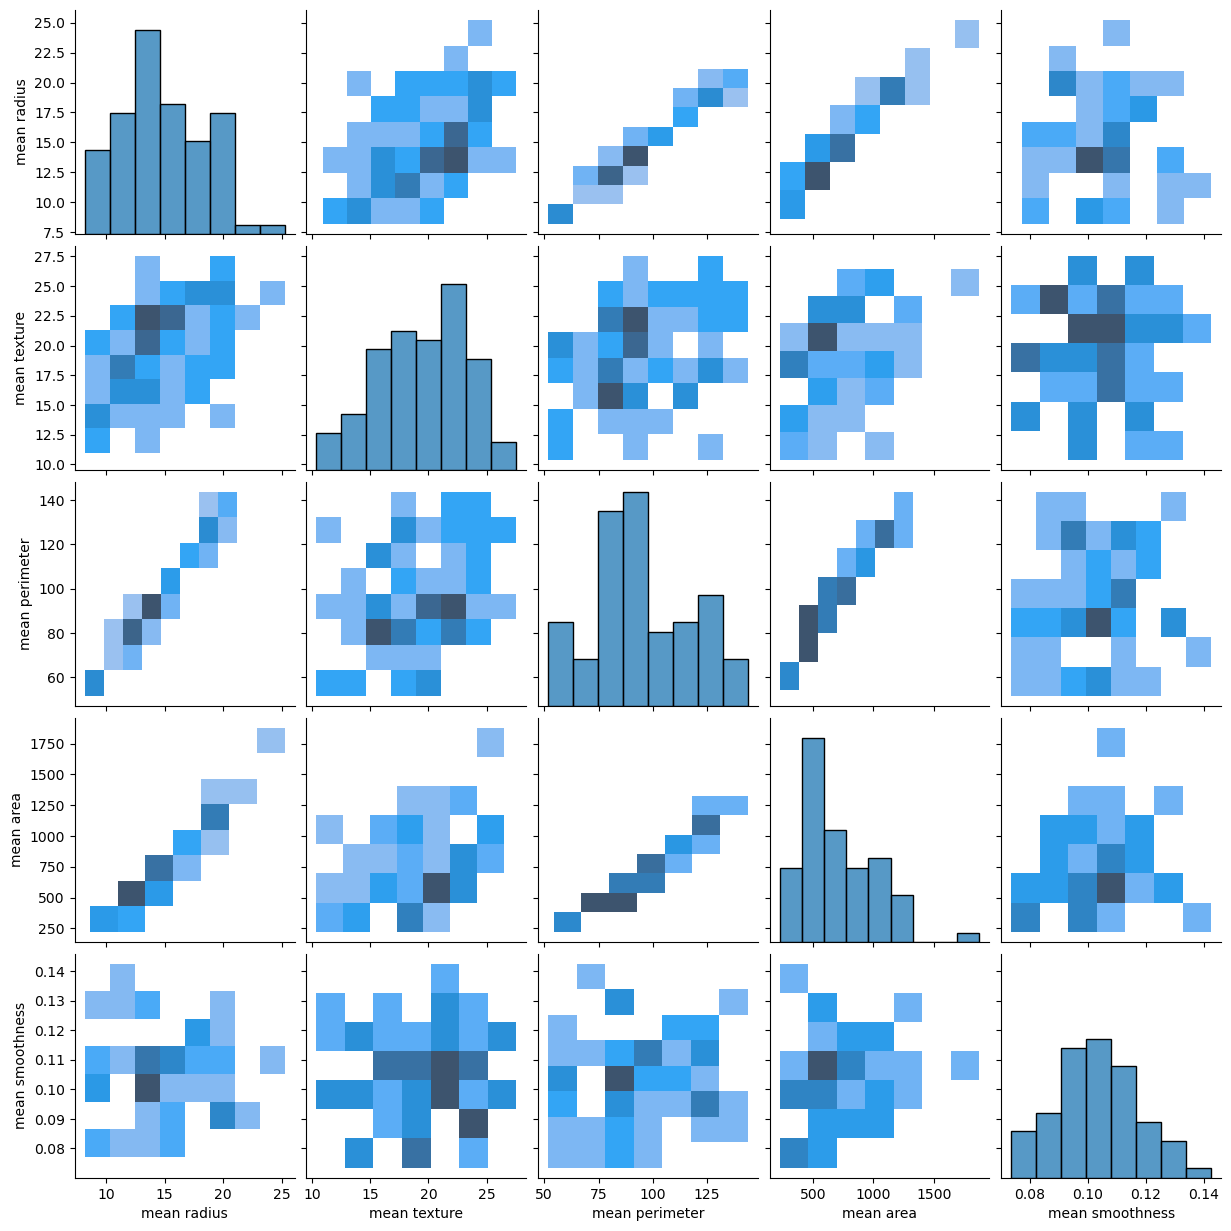

In [29]:
sns.pairplot(df.iloc[0:100,0:5],kind="hist")

C:\Users\kellyja\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\kellyja\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\kellyja\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\kellyja\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed

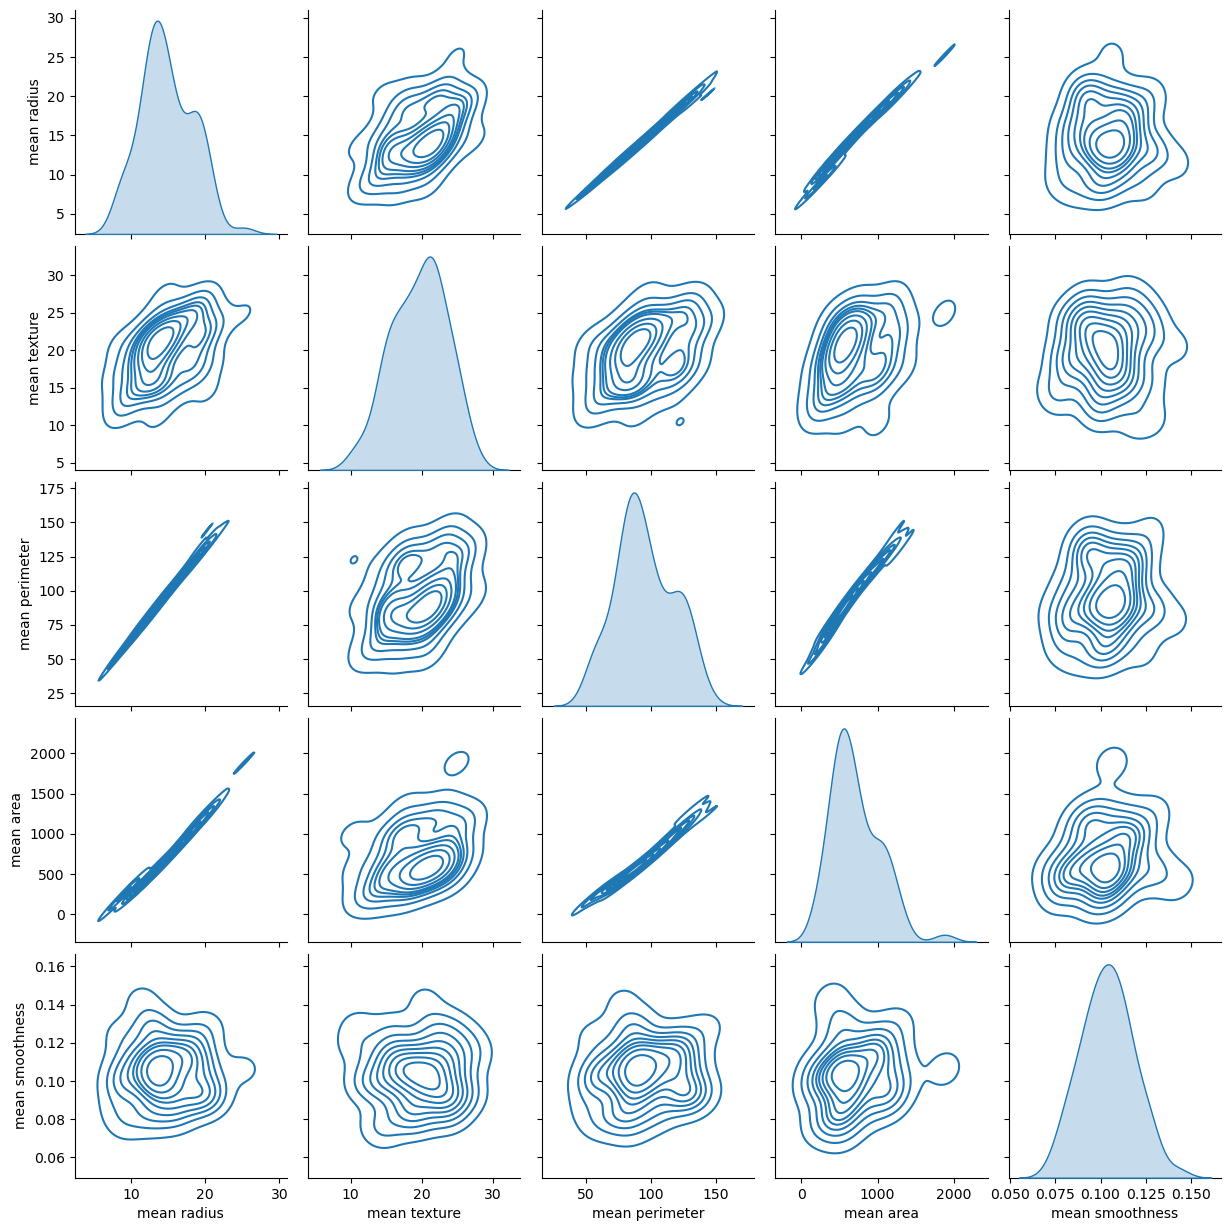

In [30]:
# another option for viewing the relationship between variables is to look at the pairplot through the lens of a "kernel density estimation" or KDE
sns.pairplot(df.iloc[0:100,0:5],kind="kde")

C:\Users\kellyja\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\kellyja\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\kellyja\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\kellyja\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed

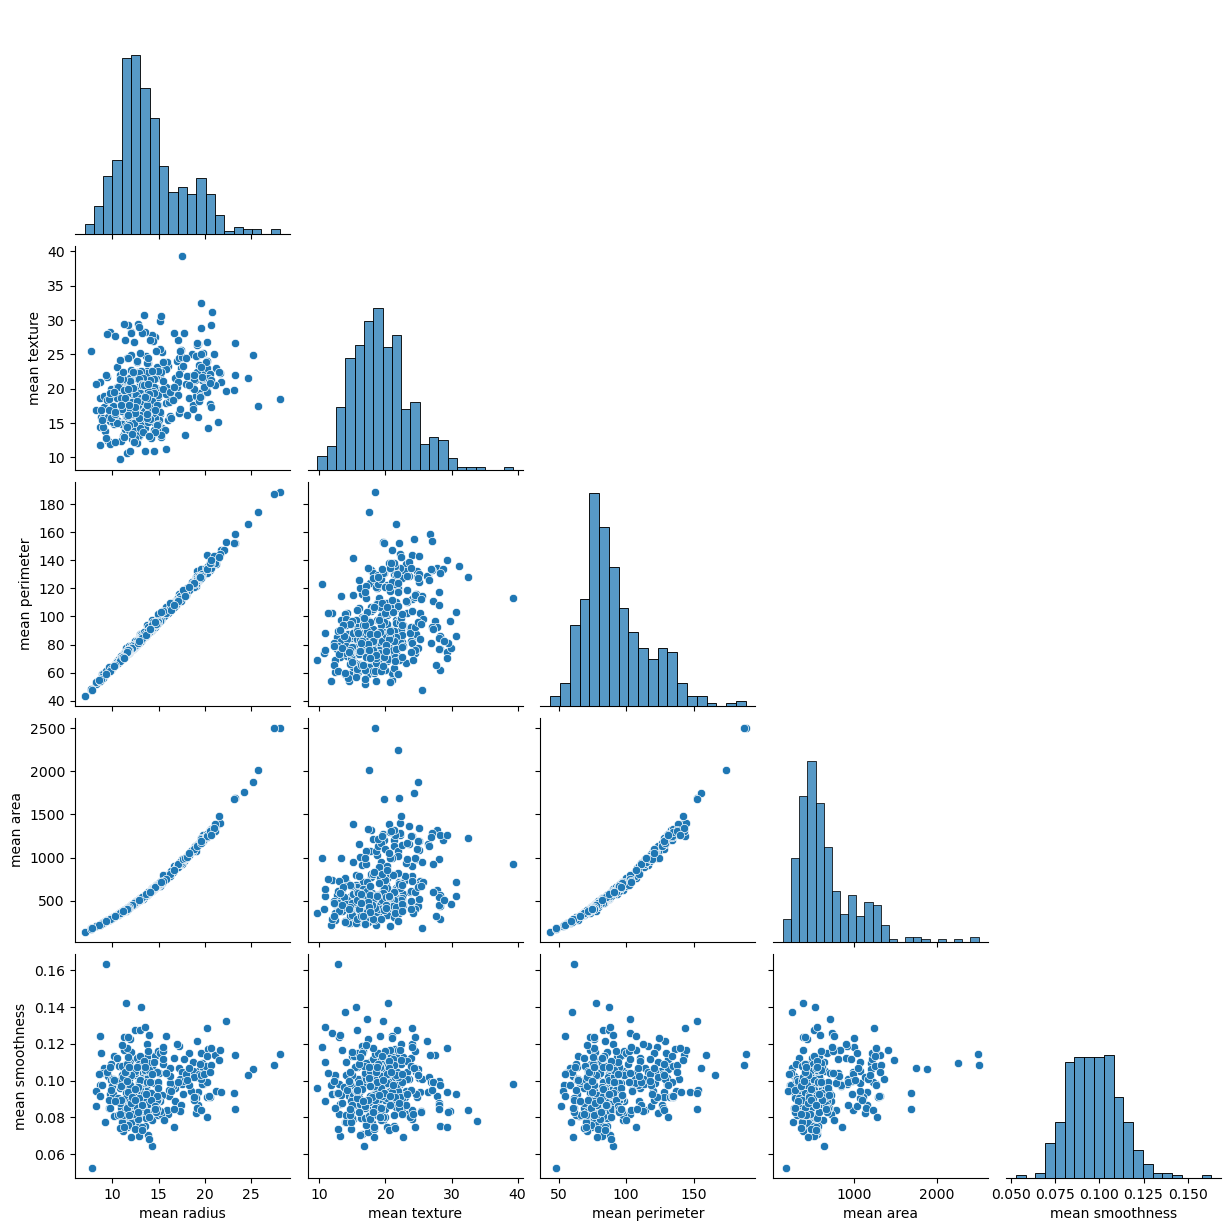

In [31]:
# use this code to avoid the duplication that takes in the normal pairplot where the other side of the grid is just the same data with mirror image
sns.pairplot(df.iloc[:,0:5],corner=True)

C:\Users\kellyja\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\kellyja\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


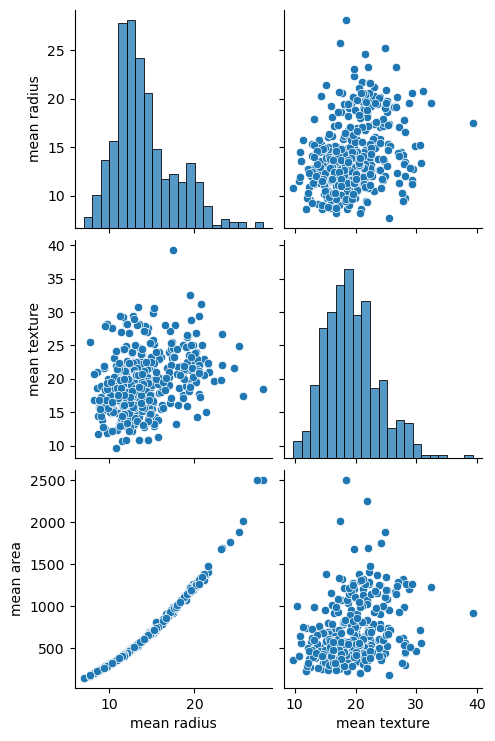

In [32]:
# the following is a way to pare down to a focus set of variables instead of the huge pairplot for all variables or even the corner technique
sns.pairplot(df, x_vars=['mean radius', 'mean texture'], \
            y_vars = ['mean radius', 'mean texture', 'mean area'])

C:\Users\kellyja\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\kellyja\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\kellyja\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\kellyja\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When gr

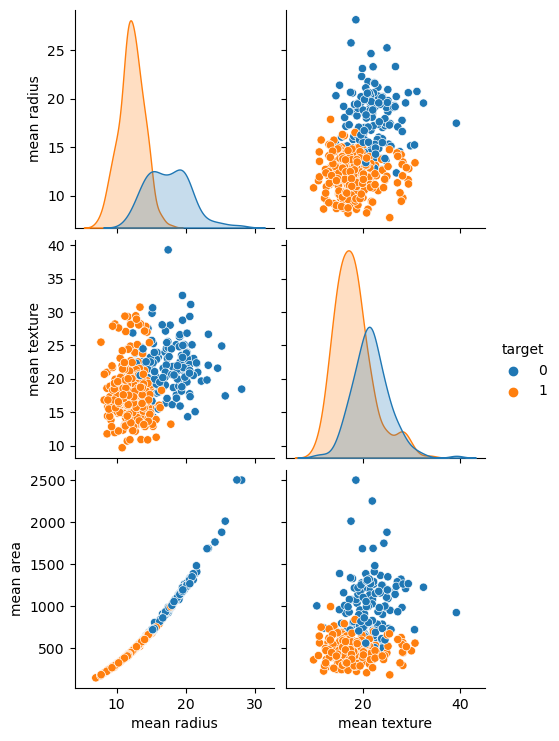

In [33]:
# Seaborn can color the plot for what is called "target", which in this data set is either 0 or 1
sns.pairplot(df, x_vars=['mean radius', 'mean texture'], \
            y_vars=['mean radius', 'mean texture', 'mean area'], hue="target")

The above changes the histograms to KDEs and separates the KDEs by the "target" variable.

To summarize this section:
- `pairplot` gives a scatterplot for each combination of numeric variables to see correlations between variables.  Only where $\neq NaN$
- The diagonal of the pairplot will give the histograms of each variable so one can see the distribution of the variable in question
- For tight linear relationships, we can see two variables are correlated versus instances where you have the "blob" of points that suggest less correlation
- Other options to see correlations are the multivariate (in this case between two variables) histograms and KDE plots between two variables
- For readability, we can use the `corner` parameter to reduce the visual noise of the full `pairplot`
- Also, we can reduce the `pairplot` down to just the variables we want to see by using `x_vars=['...', '...']` and `y_vars=['...', '...']`
- Lastly, we can give a color to a categorical variable to see how the data behave between those categorical variables with `hue="field_name"`
- Ultimately, this section helps one to understand correlations between variables.

# Section 6: Correlation matrix and histograms

## Correlation Matrix

In [34]:
# gives the correlation coefficient between a row variable and a column variable; the course does not have this issue but I am getting an error
# because the one object column is not numeric; not sure why, but instructor just does df.corr(); I had to select only numeric columns
df.select_dtypes(include=[float, int]).corr()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
mean radius,1.000000,0.325048,0.997917,0.985544,0.174663,0.538038,0.669628,0.824008,0.133417,-0.300202,...,0.341666,0.962182,0.940064,0.148959,0.467609,0.542298,0.757117,0.164307,0.010295,-0.732425
mean texture,0.325048,1.000000,0.346173,0.331863,-0.027530,0.194730,0.266315,0.318055,0.050521,-0.084390,...,0.906691,0.365793,0.355472,0.091203,0.254561,0.284586,0.287045,0.116212,0.125186,-0.401623
mean perimeter,0.997917,0.346173,1.000000,0.984596,0.216465,0.543423,0.699639,0.841415,0.179526,-0.255071,...,0.350760,0.967086,0.938398,0.148894,0.459167,0.561462,0.767027,0.208464,0.054657,-0.747156
mean area,0.985544,0.331863,0.984596,1.000000,0.243077,0.511137,0.688334,0.833180,0.227485,-0.261360,...,0.323158,0.955064,0.962428,0.160463,0.381476,0.508175,0.707686,0.143392,-0.001199,-0.708695
mean smoothness,0.174663,-0.027530,0.216465,0.243077,1.000000,0.659016,0.514269,0.551066,0.537296,0.605252,...,-0.067103,0.273250,0.197203,0.802707,0.498369,0.418206,0.502253,0.402976,0.541628,-0.352710
mean compactness,0.538038,0.194730,0.543423,0.511137,0.659016,1.000000,0.879309,0.819829,0.621033,0.557747,...,0.184561,0.601413,0.510924,0.549237,0.874209,0.810086,0.809629,0.538014,0.691924,-0.597064
mean concavity,0.669628,0.266315,0.699639,0.688334,0.514269,0.879309,1.000000,0.923731,0.550682,0.374206,...,0.291333,0.734949,0.673204,0.452264,0.752790,0.875606,0.846779,0.421957,0.535975,-0.668180
mean concave points,0.824008,0.318055,0.841415,0.833180,0.551066,0.819829,0.923731,1.000000,0.483042,0.140263,...,0.330107,0.862274,0.805123,0.466339,0.691116,0.768695,0.909876,0.395455,0.365993,-0.770338
mean symmetry,0.133417,0.050521,0.179526,0.227485,0.537296,0.621033,0.550682,0.483042,1.000000,0.501603,...,0.052486,0.227449,0.201576,0.427002,0.519371,0.449870,0.439186,0.732451,0.505831,-0.340402
mean fractal dimension,-0.300202,-0.084390,-0.255071,-0.261360,0.605252,0.557747,0.374206,0.140263,0.501603,1.000000,...,-0.089427,-0.198293,-0.219083,0.533255,0.474439,0.333802,0.176135,0.398122,0.781241,-0.002829


In [35]:
# the above correlation matrix is based on the Pearson method; we can specify to the "spearman" method as well
df.select_dtypes(include=[float, int]).corr(method="spearman")

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
mean radius,1.000000,0.344725,0.997749,0.999576,0.169184,0.497475,0.645671,0.751544,0.070392,-0.348380,...,0.346930,0.972681,0.979264,0.148313,0.504769,0.606490,0.733641,0.180743,0.063549,-0.733467
mean texture,0.344725,1.000000,0.359269,0.359408,0.038101,0.229017,0.328268,0.331700,0.101711,-0.063572,...,0.909606,0.388999,0.369901,0.119395,0.273564,0.333329,0.316531,0.152880,0.136621,-0.452210
mean perimeter,0.997749,0.359269,1.000000,0.996912,0.229717,0.537296,0.694077,0.785609,0.140539,-0.303778,...,0.359174,0.978415,0.981023,0.150193,0.539578,0.637925,0.761818,0.229922,0.119744,-0.751495
mean area,0.999576,0.359408,0.996912,1.000000,0.264763,0.507626,0.654496,0.768773,0.157905,-0.329902,...,0.328210,0.975620,0.982859,0.162162,0.480416,0.604220,0.731816,0.232333,0.062230,-0.746085
mean smoothness,0.169184,0.038101,0.229717,0.264763,1.000000,0.710250,0.532518,0.583834,0.530026,0.595865,...,-0.020979,0.289849,0.218949,0.797618,0.524896,0.433014,0.520340,0.397601,0.539391,-0.374563
mean compactness,0.497475,0.229017,0.537296,0.507626,0.710250,1.000000,0.892667,0.833556,0.561032,0.487029,...,0.187945,0.600717,0.533787,0.565145,0.902582,0.834410,0.817825,0.476255,0.696460,-0.611398
mean concavity,0.645671,0.328268,0.694077,0.654496,0.532518,0.892667,1.000000,0.927982,0.478623,0.298458,...,0.329887,0.719113,0.689793,0.480758,0.846959,0.934431,0.906302,0.418654,0.584532,-0.731078
mean concave points,0.751544,0.331700,0.785609,0.768773,0.583834,0.833556,0.927982,1.000000,0.448761,0.128940,...,0.323526,0.816065,0.778807,0.502542,0.770450,0.830437,0.932071,0.388829,0.437506,-0.779829
mean symmetry,0.070392,0.101711,0.140539,0.157905,0.530026,0.561032,0.478623,0.448761,1.000000,0.433460,...,0.073616,0.184485,0.152022,0.428929,0.482507,0.404031,0.402897,0.732966,0.455972,-0.345838
mean fractal dimension,-0.348380,-0.063572,-0.303778,-0.329902,0.595865,0.487029,0.298458,0.128940,0.433460,1.000000,...,-0.088939,-0.250229,-0.295489,0.506471,0.414460,0.237509,0.139690,0.330143,0.756192,0.019049


### Choosing Between Pearson and Spearman
- Linear vs. Monotonic Relationships: If you expect a linear relationship and your data meet the assumptions of normality and linearity, use Pearson correlation. If the relationship is monotonic but not linear, or if the data do not meet the assumptions of normality, use Spearman correlation.
- Sensitivity to Outliers: If your data contain outliers that you don't want to overly influence the correlation measure, Spearman correlation might be more appropriate.
- Data Type: For continuous, normally distributed data, Pearson is typically used. For ordinal data or non-normally distributed data, Spearman is preferred.

#### Monotonic
- The key point to remember is that in a monotonic relationship, the direction of change is consistent. It doesn’t have to be perfectly linear, but it should not change direction (no peaks or valleys).
- If you keep in mind that "monotonic" means "one direction" (either up or down but not both), it should be easier to remember what it means and when to use it.

#### How is monotonicity different from linear correlation?

1. Linearity:

- Strong Linear Correlation: The relationship is both monotonic and linear. The data points lie close to a straight line.
- Monotonic Relationship: The relationship is consistently in one direction (either increasing or decreasing) but can be non-linear. The data points may form a curve or other pattern, as long as they do not change direction.
Correlation Coefficients:

2. Correlation Coefficients
- Pearson Correlation (Linear): Measures the strength and direction of the linear relationship between two variables.
- Spearman Correlation (Monotonic): Measures the strength and direction of the monotonic relationship between two variables, based on ranks.
Sensitivity to Non-linearity:

3. Sensitivity to Non-Linearity
- Linear Correlation: Sensitive to non-linear relationships; a strong non-linear but monotonic relationship might result in a lower Pearson correlation coefficient.
- Monotonic Relationship: Can capture both linear and non-linear monotonic relationships; a strong monotonic relationship will yield a high Spearman correlation coefficient regardless of linearity.

## Heatmap

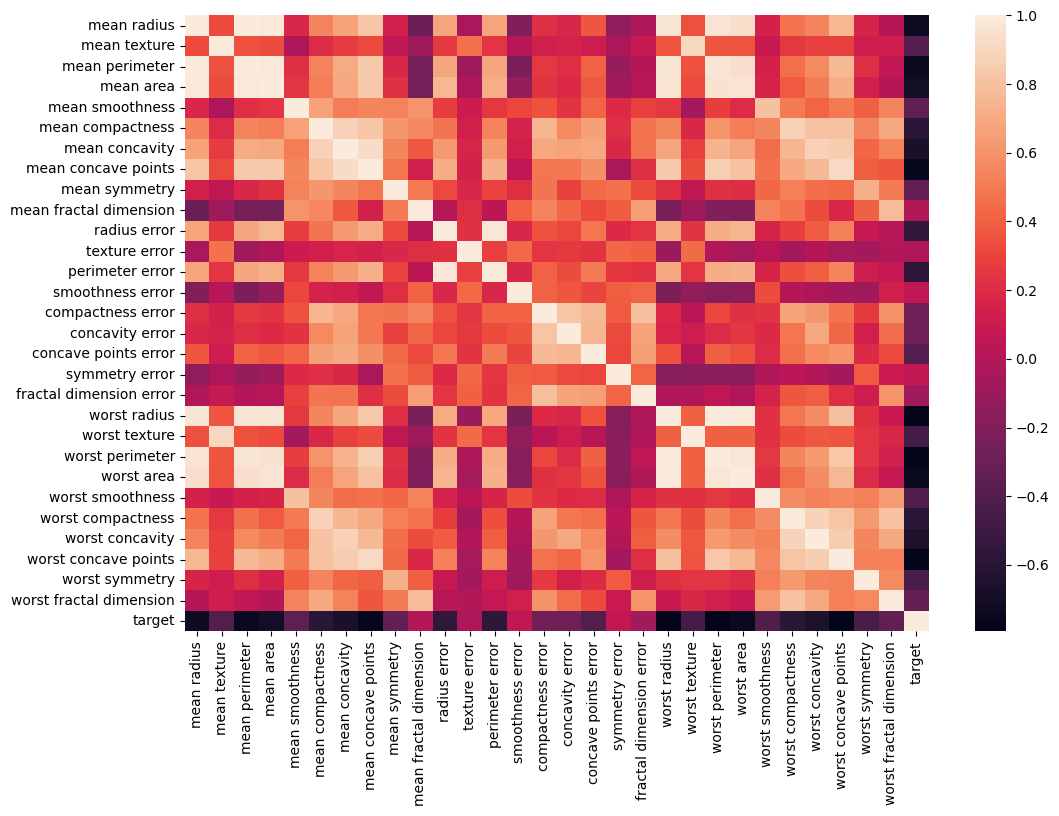

In [36]:
# this view allows you to see both strength of the various correlations and direction of that correlation
plt.figure(figsize=(12,8))
sns.heatmap(df.select_dtypes(include=[float, int]).corr())

plt.show()

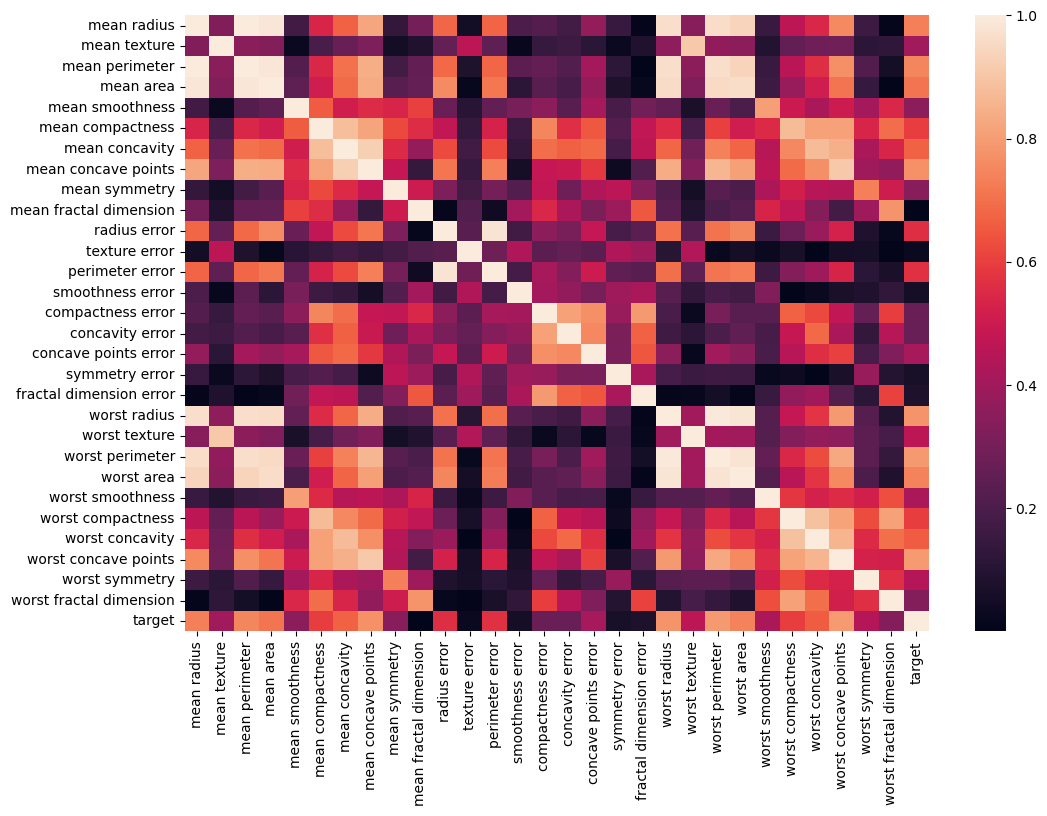

In [37]:
# this heatmap view simplifies what we're looking for to just strength of correlation without regard to direction
plt.figure(figsize=(12,8))
sns.heatmap(df.select_dtypes(include=[float, int]).corr().abs())

plt.show()

### Colinearity

Collinearity refers to a situation in statistical modeling where two or more predictor variables in a multiple regression model are highly linearly related. When predictor variables are collinear, one can be nearly perfectly predicted by the others.

Problems Arising from Collinearity
1. Inflated Standard Errors:

Collinearity increases the standard errors of the coefficient estimates. This makes the estimates less precise and the confidence intervals wider.

2. Unstable Estimates:

The coefficient estimates become very sensitive to changes in the model. Adding or removing a collinear variable can cause large changes in the estimated coefficients.

3. Difficulty in Determining Variable Importance:

It becomes challenging to determine the individual effect of collinear variables on the dependent variable because their effects are intertwined.
Multicollinearity:

In cases of perfect multicollinearity (when a variable is a perfect linear combination of others), the model cannot estimate the coefficients uniquely, leading to issues with the invertibility of the matrix in the regression equation.

Detecting Collinearity

A Seaborn heatmap can be very useful for spotting potential issues with collinearity by visualizing the correlation matrix of the predictor variables. High correlation coefficients (close to 1 or -1) between pairs of variables indicate collinearity.

Interpreting the Heatmap:

Look for pairs of variables with high absolute values of correlation coefficients (close to 1 or -1).
High correlations (e.g., > 0.8 or < -0.8) indicate potential collinearity issues.

Summary
- Collinearity: High linear relationship between predictor variables leading to instability in regression estimates.
- Problems: Inflated standard errors, unstable estimates, difficulty in determining variable importance, and issues with model estimation.
- Detection with Heatmap: Visualize the correlation matrix to spot high correlations.
- Additional Tools: Use VIF and condition index for a more detailed analysis.

# Section 7: Stacked histograms

In [38]:
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,NaN,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,NaN,2019.0,0.16220,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,NaN,NaN,0.0869,0.07017,NaN,0.05667,...,23.41,158.80,1956.0,0.12380,0.1866,0.2416,0.1860,0.2750,NaN,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,NaN,NaN,NaN,0.05999,...,25.53,NaN,1709.0,0.14440,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,NaN,0.2597,0.09744,...,26.50,NaN,567.7,0.20980,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,NaN,NaN,NaN,0.13280,0.1980,NaN,0.1809,NaN,...,16.67,152.20,1575.0,0.13740,NaN,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,NaN,0.2439,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.2113,0.4107,0.2216,0.2060,0.07115,0
565,NaN,28.25,131.20,1261.0,0.09780,0.10340,0.1440,0.09791,0.1752,NaN,...,38.25,155.00,1731.0,0.11660,0.1922,0.3215,0.1628,0.2572,NaN,0
566,16.60,28.08,108.30,NaN,0.08455,0.10230,NaN,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,NaN,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.3514,0.15200,0.2397,NaN,...,NaN,184.60,1821.0,0.16500,0.8681,0.9387,0.2650,0.4087,0.12400,0


C:\Users\kellyja\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\kellyja\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\kellyja\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\kellyja\AppData\Local\anaconda3\Lib\site-packages\s

<Axes: xlabel='mean radius', ylabel='Count'>

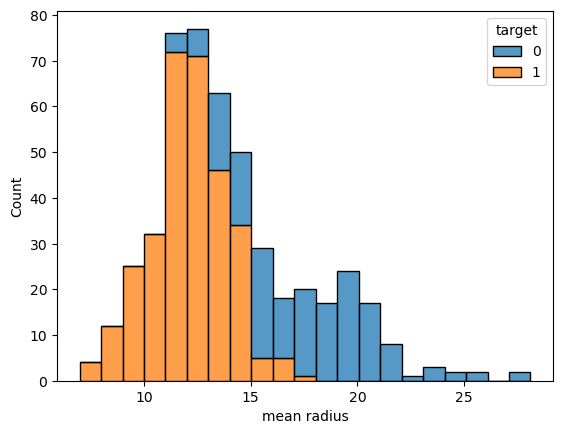

In [39]:
# we can used stacked histograms to see how useful a given variable is in predicting the value of the "target" in this example
sns.histplot(df,x="mean radius", hue="target", multiple="stack")

We can see in the above that from the values of 'mean radius' from 10 to 15 or so, has a high predictive value of a "target" of 1.  From 15 to $\infty$ we have low predictive power of the target.

C:\Users\kellyja\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\kellyja\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\kellyja\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\kellyja\AppData\Local\anaconda3\Lib\site-packages\s

<Axes: xlabel='worst concavity', ylabel='Count'>

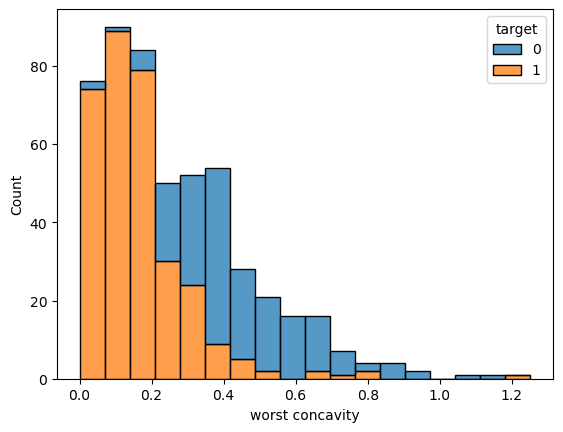

In [40]:
# now looking at another variable, "worst concavity", for the same analysis
sns.histplot(df, x="worst concavity", hue="target", multiple="stack")

C:\Users\kellyja\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\kellyja\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\kellyja\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\kellyja\AppData\Local\anaconda3\Lib\site-packages\s

<Axes: xlabel='worst perimeter', ylabel='Count'>

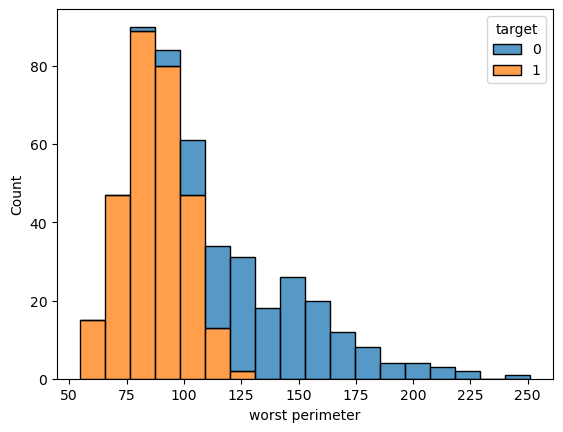

In [41]:
# same exercise again
sns.histplot(df, x="worst perimeter", hue="target", multiple="stack")

In [42]:
# creating a subset of only numerical columns, dropping target
columns = df.select_dtypes(exclude="object").drop("target",axis=1).columns

In [43]:
# here's the list
columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'smoothness error',
       'compactness error', 'concavity error', 'concave points error',
       'symmetry error', 'fractal dimension error', 'worst radius',
       'worst texture', 'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'],
      dtype='object')

C:\Users\kellyja\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\kellyja\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\kellyja\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\kellyja\AppData\Local\anaconda3\Lib\site-packages\s

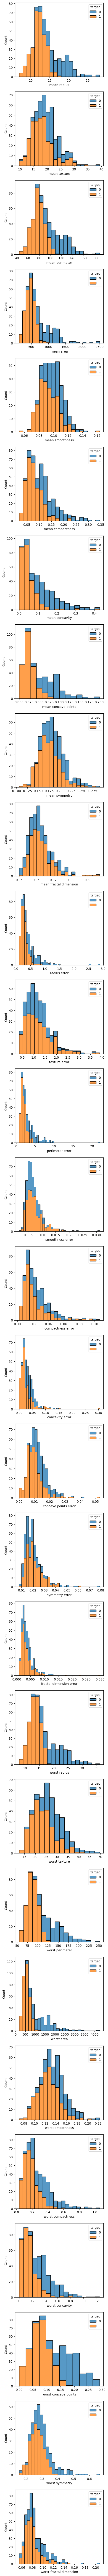

In [44]:
# creating subplots for all numerical variables
fig, axs = plt.subplots(len(columns), 1, figsize=(5, 5*len(columns)))

for i in range(len(columns)):
    column_name = columns[i]
    sns.histplot(df, x=column_name, hue="target", multiple="stack", ax=axs[i])

These are very useful for classification problems in an unsupervised machine learning problem.

# Section 8: Sweetviz

In [45]:
import sweetviz

In [46]:
report = sweetviz.analyze(df, target_feat="target")

                                             |          | [  0%]   00:00 -> (? left)

In [47]:
report.show_html(layout="vertical") #creates a new window

#report.show_notebook() #shows directly in Jupyter

#report2 = sweetviz.compare([df.head(50),"Dataset 1"],[df.tail(50), "Dataset 2"],target_feat="target") #splitting data into two datasets
#report2.show_html(layout="vertical")

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


# Section 9: Pandas profiling

In [48]:
import pandas as pd
from pandas_profiling import ProfileReport

AttributeError: module 'numba' has no attribute 'generated_jit'

In [49]:
import numba
print(numba.__version__)

0.60.0
